                                        Week 06 : Cost Functions

NOTES:
    
A cost function is an important parameter that determines how well a 
machine learning model performs for a given dataset. It calculates the 
difference between the expected value and predicted value and 
represents it as a single real number.

we need a function that can find when the model is most accurate by 
finding the spot between the undertrained and overtrained model.

Cost function is a measure of how wrong the model is in estimating the 
relationship between X(input) and Y(output) Parameter.

For getting the optimal solution; we need a Cost function. 
Minimum cost function => most optimal solution.

"Gradient Descent is an optimization algorithm which is used for optimizing the cost function or error in the model."

Gradient descent is an iterative process where the model gradually converges towards a minimum value, and if the model iterates further than this point, it produces little or zero changes in the loss. This point is known as convergence, and at this point, the error is least, and the cost function is optimized.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor as SGR

1)
Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with experience in x-axis and salary in y axis.

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

d. Use the scikit learn and compare the results of MSE.

In [2]:
#importing data and defining X and Y

df = pd.read_csv('/home/AIML_Student/Documents/B34_aiml/Lab6/sal_exp.csv')
d = df.to_numpy()
print(df)

#salary as dependent variable 
Y = d[:,0] 
Yf = df['Salary']

#experience as independent variable
X = d[:,1]
Xf = df['Experience'] 

print(X.shape)
print(Y.shape)

X = X.reshape(-1, 1) #- only applicable to array format
Y = Y.reshape(-1, 1)

    Salary  Experience
0      1.7         1.2
1      2.4         1.5
2      2.3         1.9
3      3.1         2.2
4      3.7         2.4
5      4.2         2.5
6      4.4         2.8
7      6.1         3.1
8      5.4         3.3
9      5.7         3.7
10     6.4         4.2
11     6.2         4.4
(12,)
(12,)


In [3]:
#performing simple linear regression (SLR)
model = LinearRegression(fit_intercept = True)
model.fit(X,Y)

LinearRegression()

In [4]:
r_sq = model.score(X,Y)
b0 = model.intercept_
b1 = model.coef_
print(f"coefficient of determination: {r_sq}")
print(f"intercept: b0: {b0}")
print(f"slope: b1: {b1}")

coefficient of determination: 0.90842569244828
intercept: b0: [-0.03563861]
slope: b1: [[1.56709829]]


In [5]:
Y_pred = model.predict(X)

In [6]:
mse = mean_squared_error(Y, Y_pred)
rmse = math.sqrt(mse)
print("rmse: ",rmse)

rmse:  0.4833912577848358


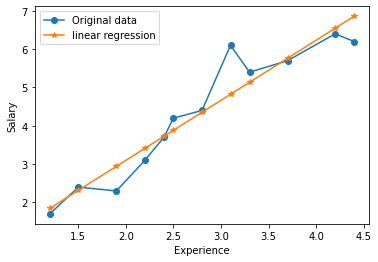

In [7]:
#repesenting data
plt.plot(X,Y,marker='o',label = 'Original data')
plt.plot(X,Y_pred, marker='*',label = 'linear regression')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

a)
Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

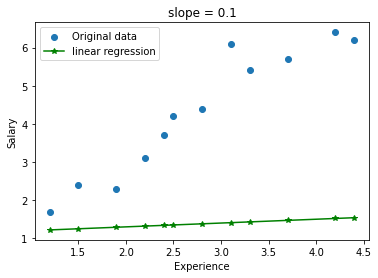

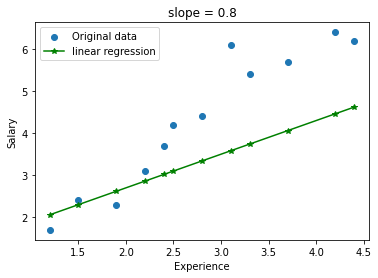

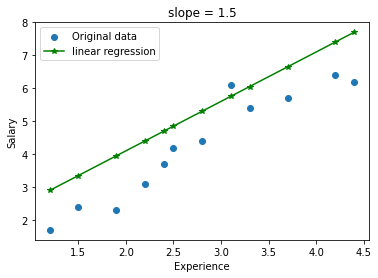

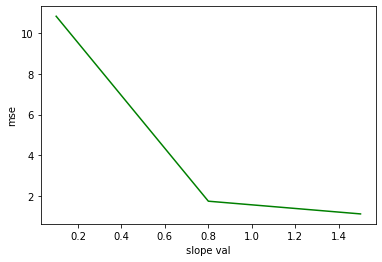

In [8]:
b0 = 1.1
b1_vals = [0.1, 0.8, 1.5]
mse1 = []
Y_pred_new = []

for b1 in b1_vals:
    Y_pred1 = b1*X + b0
    mse = mean_squared_error(Y, Y_pred1)
    mse1.append(mse)
    Y_pred_new.append(Y_pred1)
    plt.scatter(X,Y,marker='o',label = 'Original data')
    plt.plot(X,Y_pred1, marker='*',color = 'g',label = 'linear regression')
    plt.xlabel("Experience")
    plt.ylabel("Salary")
    plt.title("slope = {}".format(b1))
    plt.legend()
    plt.show()

plt.plot(b1_vals,mse1,color='g')
plt.ylabel("mse")
plt.xlabel("slope val")
plt.show()


b)
Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

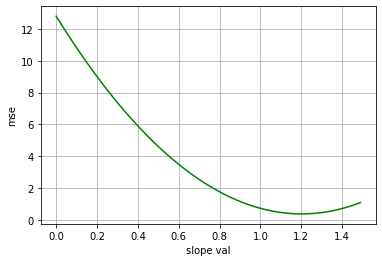

In [9]:
b0 = 1.1
b1 = 0
b1_vals = []
mse1 = []

while b1<=1.5: #for loop does not support float
    Y_pred1 = b1*X + b0
    mse = mean_squared_error(Y, Y_pred1)
    mse1.append(mse)
    b1_vals.append(b1)
    b1 = b1+0.01

plt.plot(b1_vals,mse1,color='g')
plt.ylabel("mse")
plt.xlabel("slope val")
plt.grid(True)
plt.show()

c)
Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

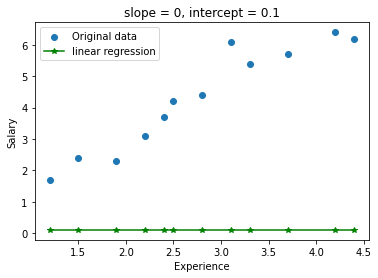

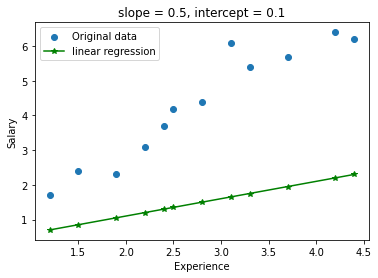

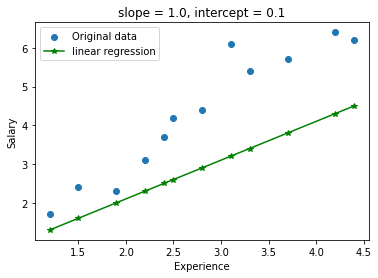

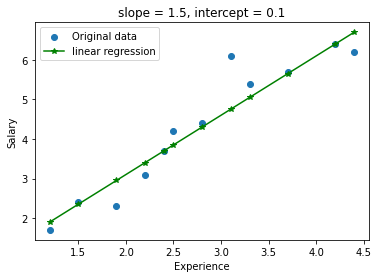

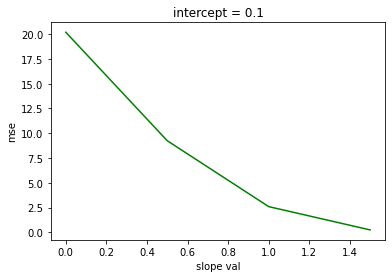

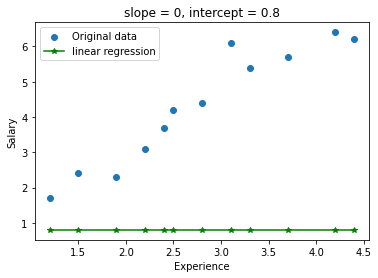

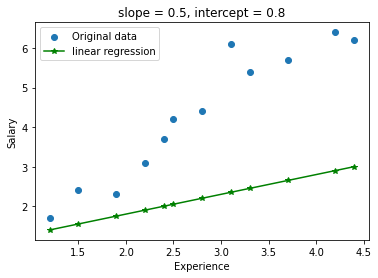

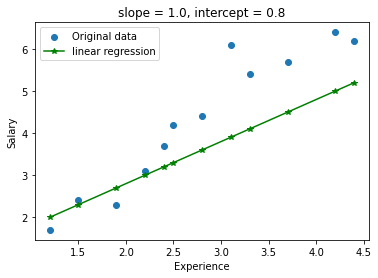

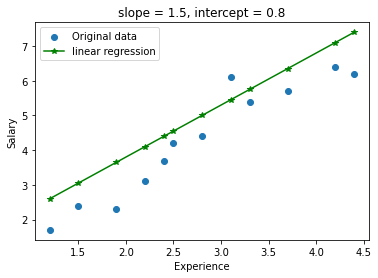

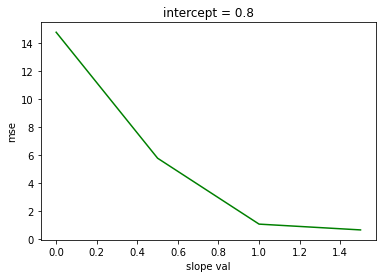

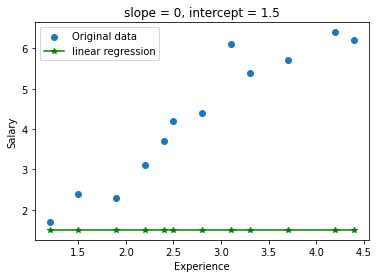

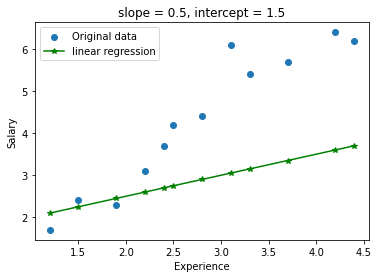

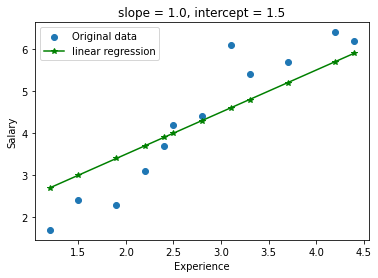

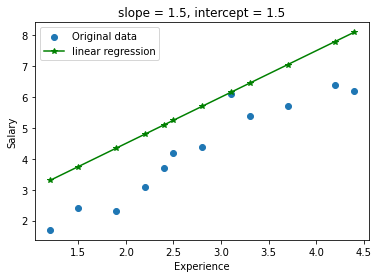

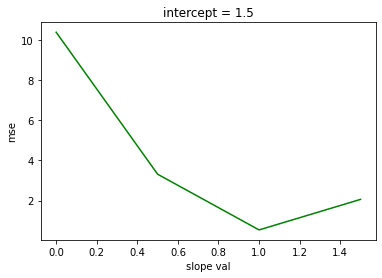

In [10]:
b0_vals = [0.1, 0.8, 1.5] #intercept values
b1 = 0
b1_vals = [0,0.5,1,1.5] #slope values; 0.01 increment gives too many graphs
mse1 = []

for b0 in b0_vals:
    while b1<=1.5: #for loop does not support float
        Y_pred1 = b1*X + b0
        mse = mean_squared_error(Y, Y_pred1)
        
        plt.scatter(X,Y,marker='o',label = 'Original data')
        plt.plot(X,Y_pred1, marker='*',color = 'g',label = 'linear regression')
        plt.xlabel("Experience")
        plt.ylabel("Salary")
        plt.title("slope = {}, intercept = {}".format(b1,b0))
        plt.legend()
        plt.show()
        
        mse1.append(mse)
        b1 = b1+0.5
    
    plt.plot(b1_vals,mse1,color='g')
    plt.ylabel("mse")
    plt.xlabel("slope val")
    plt.title("intercept = {}".format(b0))
    plt.show()
    
    b1 = 0 #reset
    mse1 = []


2)
Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs.

a. Plot the graph of error versus iteration.

b. Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

NOTES:
An epoch in machine learning means one complete pass of the training dataset through the algorithm. 

In [12]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(9, 1) (3, 1) (9, 1) (3, 1)
(9, 1) (3, 1) (9, 1) (3, 1)


In [13]:
#initialize slope and intercept
b0,b1 = 0,0
alpha = 0.01 #learn rate

model = SGR(alpha = alpha, fit_intercept = False, max_iter = 60)
model.fit(X_train,Y_train.ravel())

SGDRegressor(alpha=0.01, fit_intercept=False, max_iter=60)

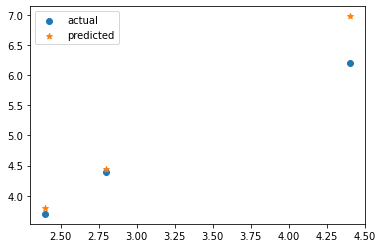

In [14]:
Y_pred = model.predict(X_test)

plt.scatter(X_test, Y_test, label = 'actual',marker='o')
plt.scatter(X_test, Y_pred, label = 'predicted',marker='*')
plt.legend()
plt.show()

In [15]:
print(Y_test.shape, Y_pred.shape)
err = []
for i in range(3):
    err1 = Y_pred[i]-Y_test[i]
    err.append(err1)

err = np.array(err)

(3, 1) (3,)


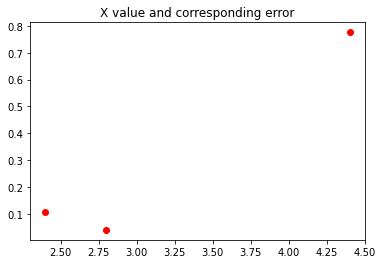

In [16]:
plt.scatter(X_test, err, color = 'r')
plt.title("X value and corresponding error")
plt.show()

In [17]:
print("coefficient: ",model.coef_)
print("intercept: ",model.intercept_)

coefficient:  [1.58553672]
intercept:  [0.]
